# Machine Learning

Ce notebook contient l'intégralité des algorithmes de machine learning testé sur les images réduites (*via SelectPercentile puis PCA*)


In [9]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'


## Import des dataframes regroupant les images réduites selon 3 PCA

Nomenclature des codes dans la colonnes code :
- 1 : BA
- 2 : ER
- 3 : EO 
- 4 : IG
- 5 : LYM
- 6 : MON
- 7 : SNE
- 8 : PLA
 
*Attention quelques coquilles dans les df*

```



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df70 = pd.read_csv('/content/drive/MyDrive/Kaggle/images_pca_70.csv',index_col='Unnamed: 0')
df80 = pd.read_csv('/content/drive/MyDrive/Kaggle/images_pca_80.csv',index_col='Unnamed: 0')
df90 = pd.read_csv('/content/drive/MyDrive/Kaggle/images_pca_90.csv',index_col='Unnamed: 0')

In [2]:
df70 = pd.read_csv('D:\Work - Data\Projects\Red Blood Cells\GitHub\PyntOfBlood\Data\images_pca_70.csv',index_col='Unnamed: 0')
df80 = pd.read_csv('D:\Work - Data\Projects\Red Blood Cells\GitHub\PyntOfBlood\Data\images_pca_80.csv',index_col='Unnamed: 0')
df90 = pd.read_csv('D:\Work - Data\Projects\Red Blood Cells\GitHub\PyntOfBlood\Data\images_pca_90.csv',index_col='Unnamed: 0')

In [3]:
df70 = df70.rename(columns={'22':"code"})
df80= df80.rename(columns={'60': 'code'})
df90 = df90.rename(columns={'236':'code'})

In [4]:
display(df70.head())
display(df80.head())
display(df90.head())

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,code
0,-472.779555,-193.233098,-691.190602,-251.269915,-1896.875016,-472.595393,-159.085734,826.572010,1169.512789,1216.433011,...,4.137282,-324.891280,285.546940,34.799908,-73.678617,-158.868835,-111.842339,25.608687,-328.659862,7
1,5360.201112,1723.798505,-922.245265,516.424335,-144.640972,97.270516,254.928627,-157.964370,398.202576,61.646743,...,-141.868874,-44.354768,-319.567410,298.010878,369.814364,-183.314903,114.877756,301.029467,-273.094697,8
2,-597.677543,-1269.419128,-1435.239874,-280.864875,-111.441930,72.346925,-739.201515,557.166361,1015.949516,-390.121868,...,962.164392,-141.214486,-24.078586,-527.959580,477.614457,-407.257653,-131.016380,479.548125,254.203822,3
3,5861.191324,577.903868,-506.969517,93.753481,-305.748193,-454.786529,324.288296,-72.499330,-721.124881,-732.019770,...,-631.127232,73.369672,-283.168398,-82.290321,-106.603054,-255.854947,-110.881054,30.297038,-10.748139,8
4,-824.649396,-1399.173430,-371.038319,-0.941376,1295.451383,-145.547868,-281.759755,600.140120,1208.490259,249.225801,...,280.908306,-508.168808,4.960744,-660.584817,963.526120,-575.749610,-628.996254,-212.121925,-120.508670,3


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,code
0,-472.779555,-193.233098,-691.190602,-251.269915,-1896.875016,-472.595393,-159.085734,826.572010,1169.512789,1216.433011,...,-444.575607,-65.871539,330.755493,170.247228,-69.025598,133.555094,277.055918,-35.627001,-70.811683,7
1,5360.201112,1723.798505,-922.245265,516.424335,-144.640972,97.270516,254.928627,-157.964370,398.202576,61.646743,...,-56.898033,69.809090,71.365858,-70.755338,18.978967,379.399117,192.666473,-43.022995,43.474694,8
2,-597.677543,-1269.419128,-1435.239874,-280.864875,-111.441930,72.346925,-739.201515,557.166361,1015.949516,-390.121868,...,-79.014243,-124.702278,313.518774,106.716404,-44.930673,-312.295303,-345.753385,76.141886,-12.815283,3
3,5861.191324,577.903868,-506.969517,93.753481,-305.748193,-454.786529,324.288296,-72.499330,-721.124881,-732.019770,...,199.231231,30.210397,-252.782790,31.348525,125.964288,-256.100588,110.480368,118.402144,209.111058,8
4,-824.649396,-1399.173430,-371.038319,-0.941376,1295.451383,-145.547868,-281.759755,600.140120,1208.490259,249.225801,...,-68.575832,-125.520411,-71.466798,-10.428797,193.078480,-304.709400,141.542267,-311.542492,-172.284992,3


,0,1,2,3,4,5,6,7,8,9,...,227,228,229,230,231,232,233,234,235,code
0,-472.779555,-193.233098,-691.190602,-251.269915,-1896.875016,-472.595393,-159.085734,826.572010,1169.512789,1216.433011,...,31.295720,9.279802,59.230025,16.674347,45.552152,51.822460,-51.701118,-38.025983,102.481631,7
1,5360.201112,1723.798505,-922.245265,516.424335,-144.640972,97.270516,254.928627,-157.964370,398.202576,61.646743,...,-20.927129,0.089638,-13.719872,-5.393203,60.699674,-42.585489,31.847696,34.806051,24.048629,8
2,-597.677543,-1269.419128,-1435.239874,-280.864875,-111.441930,72.346925,-739.201515,557.166361,1015.949516,-390.121868,...,-12.321520,-66.466254,52.658159,47.636233,35.956141,-18.027162,-3.565647,57.806345,-46.705435,3
3,5861.191324,577.903868,-506.969517,93.753481,-305.748193,-454.786529,324.288296,-72.499330,-721.124881,-732.019770,...,-33.473411,-93.015009,-28.153984,65.545684,-41.673097,54.310637,81.459810,-57.610541,-1.981732,8
4,-824.649396,-1399.173430,-371.038319,-0.941376,1295.451383,-145.547868,-281.759755,600.140120,1208.490259,249.225801,...,-129.054580,-39.175596,57.768589,-177.065280,350.074343,-25.592133,12.562849,114.543758,12.962054,3


## Séparation des données pour chaque df

In [14]:
data70 = df70.drop(['code'],axis=1)
target70 = df70['code']


X_train70, X_test70, y_train70, y_test70 = train_test_split(data70, target70, test_size=0.2, random_state=42)

In [15]:
data80 = df80.drop(['code'], axis =1)
target80 = df80['code']

from sklearn.model_selection import train_test_split

X_train80, X_test80, y_train80, y_test80 = train_test_split(data80, target80, test_size=0.2, random_state=42)

In [16]:
data90 = df90.drop(['code'], axis =1)
target90 = df90['code']

from sklearn.model_selection import train_test_split

X_train90, X_test90, y_train90, y_test90 = train_test_split(data90, target90, test_size=0.2, random_state=42)

In [9]:
file_path='D:\Work - Data\Projects\Red Blood Cells\GitHub\PyntOfBlood\Data\df90_check.csv'
df90.to_csv(file_path)

In [10]:
bdf_images_pca90=pd.read_csv('D:\Work - Data\Projects\Red Blood Cells\GitHub\PyntOfBlood\Data\images_pca_90.csv')
display(df_images_pca90.head(10))
df90.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,227,228,229,230,231,232,233,234,235,236
0,0,-472.779555,-193.233098,-691.190602,-251.269915,-1896.875016,-472.595393,-159.085734,826.572010,1169.512789,...,31.295720,9.279802,59.230025,16.674347,45.552152,51.822460,-51.701118,-38.025983,102.481631,7
1,1,5360.201112,1723.798505,-922.245265,516.424335,-144.640972,97.270516,254.928627,-157.964370,398.202576,...,-20.927129,0.089638,-13.719872,-5.393203,60.699674,-42.585489,31.847696,34.806051,24.048629,8
2,2,-597.677543,-1269.419128,-1435.239874,-280.864875,-111.441930,72.346925,-739.201515,557.166361,1015.949516,...,-12.321520,-66.466254,52.658159,47.636233,35.956141,-18.027162,-3.565647,57.806345,-46.705435,3
3,3,5861.191324,577.903868,-506.969517,93.753481,-305.748193,-454.786529,324.288296,-72.499330,-721.124881,...,-33.473411,-93.015009,-28.153984,65.545684,-41.673097,54.310637,81.459810,-57.610541,-1.981732,8
4,4,-824.649396,-1399.173430,-371.038319,-0.941376,1295.451383,-145.547868,-281.759755,600.140120,1208.490259,...,-129.054580,-39.175596,57.768589,-177.065280,350.074343,-25.592133,12.562849,114.543758,12.962054,3
5,5,-1794.166449,-130.880744,2660.199128,2061.813930,239.445632,-81.071121,-47.533567,39.840840,-1414.484757,...,178.089402,126.506722,66.139762,0.562652,127.424486,-160.734764,184.469930,43.989124,124.040720,1
6,6,-1088.740820,-294.953752,2032.054739,1863.250561,51.334244,-1365.543012,169.751563,-1000.074151,-1082.412079,...,48.890268,33.871512,117.201918,-68.253552,59.135347,-69.383880,18.017952,67.853319,-88.074302,3
7,7,-3884.396590,32.043948,-995.348890,822.122663,-47.489322,-331.328752,-365.058189,-70.946676,-588.306886,...,-80.286807,-68.922249,-23.876856,-117.138189,-64.439579,-216.330194,13.882308,93.847556,-3.627791,1
8,8,-626.552051,-967.225094,-271.122835,-82.297734,-68.232628,600.192028,2235.209507,-940.745448,-99.751713,...,-74.041944,38.424364,69.436840,-22.628494,123.983734,-90.179983,-35.824210,-148.803405,1.551916,4
9,9,-3937.095224,917.694195,92.858170,516.467172,405.878620,-257.242831,288.591979,-711.578131,-981.864844,...,24.232941,53.297427,-215.518792,100.652804,98.347989,-46.178214,4.392986,61.602764,76.277783,4


,0,1,2,3,4,5,6,7,8,9,...,227,228,229,230,231,232,233,234,235,code
0,-472.779555,-193.233098,-691.190602,-251.269915,-1896.875016,-472.595393,-159.085734,826.572010,1169.512789,1216.433011,...,31.295720,9.279802,59.230025,16.674347,45.552152,51.822460,-51.701118,-38.025983,102.481631,7
1,5360.201112,1723.798505,-922.245265,516.424335,-144.640972,97.270516,254.928627,-157.964370,398.202576,61.646743,...,-20.927129,0.089638,-13.719872,-5.393203,60.699674,-42.585489,31.847696,34.806051,24.048629,8
2,-597.677543,-1269.419128,-1435.239874,-280.864875,-111.441930,72.346925,-739.201515,557.166361,1015.949516,-390.121868,...,-12.321520,-66.466254,52.658159,47.636233,35.956141,-18.027162,-3.565647,57.806345,-46.705435,3
3,5861.191324,577.903868,-506.969517,93.753481,-305.748193,-454.786529,324.288296,-72.499330,-721.124881,-732.019770,...,-33.473411,-93.015009,-28.153984,65.545684,-41.673097,54.310637,81.459810,-57.610541,-1.981732,8
4,-824.649396,-1399.173430,-371.038319,-0.941376,1295.451383,-145.547868,-281.759755,600.140120,1208.490259,249.225801,...,-129.054580,-39.175596,57.768589,-177.065280,350.074343,-25.592133,12.562849,114.543758,12.962054,3
5,-1794.166449,-130.880744,2660.199128,2061.813930,239.445632,-81.071121,-47.533567,39.840840,-1414.484757,508.125110,...,178.089402,126.506722,66.139762,0.562652,127.424486,-160.734764,184.469930,43.989124,124.040720,1
6,-1088.740820,-294.953752,2032.054739,1863.250561,51.334244,-1365.543012,169.751563,-1000.074151,-1082.412079,-80.535276,...,48.890268,33.871512,117.201918,-68.253552,59.135347,-69.383880,18.017952,67.853319,-88.074302,3
7,-3884.396590,32.043948,-995.348890,822.122663,-47.489322,-331.328752,-365.058189,-70.946676,-588.306886,-764.530095,...,-80.286807,-68.922249,-23.876856,-117.138189,-64.439579,-216.330194,13.882308,93.847556,-3.627791,1
8,-626.552051,-967.225094,-271.122835,-82.297734,-68.232628,600.192028,2235.209507,-940.745448,-99.751713,-669.967011,...,-74.041944,38.424364,69.436840,-22.628494,123.983734,-90.179983,-35.824210,-148.803405,1.551916,4
9,-3937.095224,917.694195,92.858170,516.467172,405.878620,-257.242831,288.591979,-711.578131,-981.864844,53.071067,...,24.232941,53.297427,-215.518792,100.652804,98.347989,-46.178214,4.392986,61.602764,76.277783,4


In [12]:
df_images_pca80=pd.read_csv('D:\Work - Data\Projects\Red Blood Cells\GitHub\PyntOfBlood\Data\images_pca_80.csv')
display(df_images_pca80.head(10))
df80.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,0,-472.779555,-193.233098,-691.190602,-251.269915,-1896.875016,-472.595393,-159.085734,826.572010,1169.512789,...,-444.575607,-65.871539,330.755493,170.247228,-69.025598,133.555094,277.055918,-35.627001,-70.811683,7
1,1,5360.201112,1723.798505,-922.245265,516.424335,-144.640972,97.270516,254.928627,-157.964370,398.202576,...,-56.898033,69.809090,71.365858,-70.755338,18.978967,379.399117,192.666473,-43.022995,43.474694,8
2,2,-597.677543,-1269.419128,-1435.239874,-280.864875,-111.441930,72.346925,-739.201515,557.166361,1015.949516,...,-79.014243,-124.702278,313.518774,106.716404,-44.930673,-312.295303,-345.753385,76.141886,-12.815283,3
3,3,5861.191324,577.903868,-506.969517,93.753481,-305.748193,-454.786529,324.288296,-72.499330,-721.124881,...,199.231231,30.210397,-252.782790,31.348525,125.964288,-256.100588,110.480368,118.402144,209.111058,8
4,4,-824.649396,-1399.173430,-371.038319,-0.941376,1295.451383,-145.547868,-281.759755,600.140120,1208.490259,...,-68.575832,-125.520411,-71.466798,-10.428797,193.078480,-304.709400,141.542267,-311.542492,-172.284992,3
5,5,-1794.166449,-130.880744,2660.199128,2061.813930,239.445632,-81.071121,-47.533567,39.840840,-1414.484757,...,-67.817344,118.169177,126.016324,396.928253,321.784361,-243.588547,699.197207,-278.032539,150.011699,1
6,6,-1088.740820,-294.953752,2032.054739,1863.250561,51.334244,-1365.543012,169.751563,-1000.074151,-1082.412079,...,271.602979,-117.222791,134.995665,-65.519386,210.364942,-443.610540,44.055315,-313.618458,-69.549671,3
7,7,-3884.396590,32.043948,-995.348890,822.122663,-47.489322,-331.328752,-365.058189,-70.946676,-588.306886,...,-60.586518,9.040804,-93.628970,-511.918787,66.023312,-59.204045,409.053777,-352.168422,-77.491010,1
8,8,-626.552051,-967.225094,-271.122835,-82.297734,-68.232628,600.192028,2235.209507,-940.745448,-99.751713,...,-81.897189,262.057955,-235.080679,353.744659,-14.884060,-150.206733,-42.912422,306.298371,218.937330,4
9,9,-3937.095224,917.694195,92.858170,516.467172,405.878620,-257.242831,288.591979,-711.578131,-981.864844,...,-226.779945,-325.510660,218.971407,129.174580,-19.717898,289.911272,537.996534,-57.578350,161.182044,4


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,code
0,-472.779555,-193.233098,-691.190602,-251.269915,-1896.875016,-472.595393,-159.085734,826.572010,1169.512789,1216.433011,...,-444.575607,-65.871539,330.755493,170.247228,-69.025598,133.555094,277.055918,-35.627001,-70.811683,7
1,5360.201112,1723.798505,-922.245265,516.424335,-144.640972,97.270516,254.928627,-157.964370,398.202576,61.646743,...,-56.898033,69.809090,71.365858,-70.755338,18.978967,379.399117,192.666473,-43.022995,43.474694,8
2,-597.677543,-1269.419128,-1435.239874,-280.864875,-111.441930,72.346925,-739.201515,557.166361,1015.949516,-390.121868,...,-79.014243,-124.702278,313.518774,106.716404,-44.930673,-312.295303,-345.753385,76.141886,-12.815283,3
3,5861.191324,577.903868,-506.969517,93.753481,-305.748193,-454.786529,324.288296,-72.499330,-721.124881,-732.019770,...,199.231231,30.210397,-252.782790,31.348525,125.964288,-256.100588,110.480368,118.402144,209.111058,8
4,-824.649396,-1399.173430,-371.038319,-0.941376,1295.451383,-145.547868,-281.759755,600.140120,1208.490259,249.225801,...,-68.575832,-125.520411,-71.466798,-10.428797,193.078480,-304.709400,141.542267,-311.542492,-172.284992,3
5,-1794.166449,-130.880744,2660.199128,2061.813930,239.445632,-81.071121,-47.533567,39.840840,-1414.484757,508.125110,...,-67.817344,118.169177,126.016324,396.928253,321.784361,-243.588547,699.197207,-278.032539,150.011699,1
6,-1088.740820,-294.953752,2032.054739,1863.250561,51.334244,-1365.543012,169.751563,-1000.074151,-1082.412079,-80.535276,...,271.602979,-117.222791,134.995665,-65.519386,210.364942,-443.610540,44.055315,-313.618458,-69.549671,3
7,-3884.396590,32.043948,-995.348890,822.122663,-47.489322,-331.328752,-365.058189,-70.946676,-588.306886,-764.530095,...,-60.586518,9.040804,-93.628970,-511.918787,66.023312,-59.204045,409.053777,-352.168422,-77.491010,1
8,-626.552051,-967.225094,-271.122835,-82.297734,-68.232628,600.192028,2235.209507,-940.745448,-99.751713,-669.967011,...,-81.897189,262.057955,-235.080679,353.744659,-14.884060,-150.206733,-42.912422,306.298371,218.937330,4
9,-3937.095224,917.694195,92.858170,516.467172,405.878620,-257.242831,288.591979,-711.578131,-981.864844,53.071067,...,-226.779945,-325.510660,218.971407,129.174580,-19.717898,289.911272,537.996534,-57.578350,161.182044,4


In [13]:
df_images_pca70=pd.read_csv('D:\Work - Data\Projects\Red Blood Cells\GitHub\PyntOfBlood\Data\images_pca_70.csv')
display(df_images_pca70.head(10))
df70.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,22
0,0,-472.779555,-193.233098,-691.190602,-251.269915,-1896.875016,-472.595393,-159.085734,826.572010,1169.512789,...,4.137282,-324.891280,285.546940,34.799908,-73.678617,-158.868835,-111.842339,25.608687,-328.659862,7
1,1,5360.201112,1723.798505,-922.245265,516.424335,-144.640972,97.270516,254.928627,-157.964370,398.202576,...,-141.868874,-44.354768,-319.567410,298.010878,369.814364,-183.314903,114.877756,301.029467,-273.094697,8
2,2,-597.677543,-1269.419128,-1435.239874,-280.864875,-111.441930,72.346925,-739.201515,557.166361,1015.949516,...,962.164392,-141.214486,-24.078586,-527.959580,477.614457,-407.257653,-131.016380,479.548125,254.203822,3
3,3,5861.191324,577.903868,-506.969517,93.753481,-305.748193,-454.786529,324.288296,-72.499330,-721.124881,...,-631.127232,73.369672,-283.168398,-82.290321,-106.603054,-255.854947,-110.881054,30.297038,-10.748139,8
4,4,-824.649396,-1399.173430,-371.038319,-0.941376,1295.451383,-145.547868,-281.759755,600.140120,1208.490259,...,280.908306,-508.168808,4.960744,-660.584817,963.526120,-575.749610,-628.996254,-212.121925,-120.508670,3
5,5,-1794.166449,-130.880744,2660.199128,2061.813930,239.445632,-81.071121,-47.533567,39.840840,-1414.484757,...,-1210.765876,-358.843100,-531.215239,-54.378368,-371.040622,451.819603,-69.205852,492.940048,184.812914,1
6,6,-1088.740820,-294.953752,2032.054739,1863.250561,51.334244,-1365.543012,169.751563,-1000.074151,-1082.412079,...,-235.116246,-353.867816,-263.254923,-538.489894,-76.050742,71.287150,219.552050,-20.984244,-151.488059,3
7,7,-3884.396590,32.043948,-995.348890,822.122663,-47.489322,-331.328752,-365.058189,-70.946676,-588.306886,...,518.850161,-413.016575,-118.299857,-47.574343,-440.967590,-138.280089,-400.934069,-325.652502,-98.837993,1
8,8,-626.552051,-967.225094,-271.122835,-82.297734,-68.232628,600.192028,2235.209507,-940.745448,-99.751713,...,322.852869,962.701394,172.010380,118.911246,138.997449,-8.220694,-5.342814,763.646177,-116.086972,4
9,9,-3937.095224,917.694195,92.858170,516.467172,405.878620,-257.242831,288.591979,-711.578131,-981.864844,...,64.044404,-165.672079,-66.281423,-967.006244,201.364663,1293.943132,116.425999,-492.569552,-287.006518,4


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,code
0,-472.779555,-193.233098,-691.190602,-251.269915,-1896.875016,-472.595393,-159.085734,826.572010,1169.512789,1216.433011,...,4.137282,-324.891280,285.546940,34.799908,-73.678617,-158.868835,-111.842339,25.608687,-328.659862,7
1,5360.201112,1723.798505,-922.245265,516.424335,-144.640972,97.270516,254.928627,-157.964370,398.202576,61.646743,...,-141.868874,-44.354768,-319.567410,298.010878,369.814364,-183.314903,114.877756,301.029467,-273.094697,8
2,-597.677543,-1269.419128,-1435.239874,-280.864875,-111.441930,72.346925,-739.201515,557.166361,1015.949516,-390.121868,...,962.164392,-141.214486,-24.078586,-527.959580,477.614457,-407.257653,-131.016380,479.548125,254.203822,3
3,5861.191324,577.903868,-506.969517,93.753481,-305.748193,-454.786529,324.288296,-72.499330,-721.124881,-732.019770,...,-631.127232,73.369672,-283.168398,-82.290321,-106.603054,-255.854947,-110.881054,30.297038,-10.748139,8
4,-824.649396,-1399.173430,-371.038319,-0.941376,1295.451383,-145.547868,-281.759755,600.140120,1208.490259,249.225801,...,280.908306,-508.168808,4.960744,-660.584817,963.526120,-575.749610,-628.996254,-212.121925,-120.508670,3
5,-1794.166449,-130.880744,2660.199128,2061.813930,239.445632,-81.071121,-47.533567,39.840840,-1414.484757,508.125110,...,-1210.765876,-358.843100,-531.215239,-54.378368,-371.040622,451.819603,-69.205852,492.940048,184.812914,1
6,-1088.740820,-294.953752,2032.054739,1863.250561,51.334244,-1365.543012,169.751563,-1000.074151,-1082.412079,-80.535276,...,-235.116246,-353.867816,-263.254923,-538.489894,-76.050742,71.287150,219.552050,-20.984244,-151.488059,3
7,-3884.396590,32.043948,-995.348890,822.122663,-47.489322,-331.328752,-365.058189,-70.946676,-588.306886,-764.530095,...,518.850161,-413.016575,-118.299857,-47.574343,-440.967590,-138.280089,-400.934069,-325.652502,-98.837993,1
8,-626.552051,-967.225094,-271.122835,-82.297734,-68.232628,600.192028,2235.209507,-940.745448,-99.751713,-669.967011,...,322.852869,962.701394,172.010380,118.911246,138.997449,-8.220694,-5.342814,763.646177,-116.086972,4
9,-3937.095224,917.694195,92.858170,516.467172,405.878620,-257.242831,288.591979,-711.578131,-981.864844,53.071067,...,64.044404,-165.672079,-66.281423,-967.006244,201.364663,1293.943132,116.425999,-492.569552,-287.006518,4


## Normalisation des données

In [17]:
scaler=MinMaxScaler()

#Standardisation PCA 0.7
X_train70_sc=scaler.fit_transform(X_train70)
X_test70_sc=scaler.transform(X_test70)

#Standardisation PCA 0.8
X_train80_sc=scaler.fit_transform(X_train80)
X_test80_sc=scaler.transform(X_test80)

#Standardisation PCA 0.9
X_train90_sc=scaler.fit_transform(X_train90)
X_test90_sc=scaler.transform(X_test90)

## Machine learning

### KNN sur données non normalisées
1.   k allant de 2 à 100
2.   3 métrics = minkowsky, manhattan, euclidienne
3.   Représentation graphique des scores train et test obtenu (*évaluation overfitting en fonction des paramètres et du meilleur score*)


#### **KNN sur df70 (PCA 0.7)**
*Données non normalisées*





In [18]:
score_train_minko =[]
score_test_minko=[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train70, y_train70)
    score_train_minko.append(knn.score(X_train70, y_train70))
    score_test_minko.append(knn.score(X_test70, y_test70))

In [19]:
score_train_manh =[]
score_test_manh=[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k, metric='manhattan')
    knn.fit(X_train70, y_train70)
    score_train_manh.append(knn.score(X_train70, y_train70))
    score_test_manh.append(knn.score(X_test70, y_test70))

In [ ]:
score_train_eucl =[]
score_test_eucl=[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    knn.fit(X_train70, y_train70)
    score_train_eucl.append(knn.score(X_train70, y_train70))
    score_test_eucl.append(knn.score(X_test70, y_test70))

#### **KNN sur df80 (PCA 0.8)**

*Données non normalisées*

In [ ]:
score_train_minko80 =[]
score_test_minko80=[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train80, y_train80)
    score_train_minko80.append(knn.score(X_train80, y_train80))
    score_test_minko80.append(knn.score(X_test80, y_test80))

In [ ]:
score_train_manh80 =[]
score_test_manh80=[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k, metric='manhattan')
    knn.fit(X_train80, y_train80)
    score_train_manh80.append(knn.score(X_train80, y_train80))
    score_test_manh80.append(knn.score(X_test80, y_test80))

In [ ]:
score_train_eucl80 =[]
score_test_eucl80 =[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    knn.fit(X_train80, y_train80)
    score_train_eucl80.append(knn.score(X_train80, y_train80))
    score_test_eucl80.append(knn.score(X_test80, y_test80))

#### **KNN sur df90 (PCA 0.9)**
*Données non normalisées*

In [ ]:
score_train_minko90 =[]
score_test_minko90=[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train90, y_train90)
    score_train_minko90.append(knn.score(X_train90, y_train90))
    score_test_minko90.append(knn.score(X_test90, y_test90))

KeyboardInterrupt: 

In [ ]:
score_train_manh90 =[]
score_test_manh90=[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k, metric='manhattan')
    knn.fit(X_train90, y_train90)
    score_train_manh90.append(knn.score(X_train90, y_train90))
    score_test_manh90.append(knn.score(X_test90, y_test90))

In [ ]:
score_train_eucl90 =[]
score_test_eucl90 =[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    knn.fit(X_train90, y_train90)
    score_train_eucl90.append(knn.score(X_train90, y_train90))
    score_test_eucl90.append(knn.score(X_test90, y_test90))

#### **Représentation graphique pour chaque PCA**

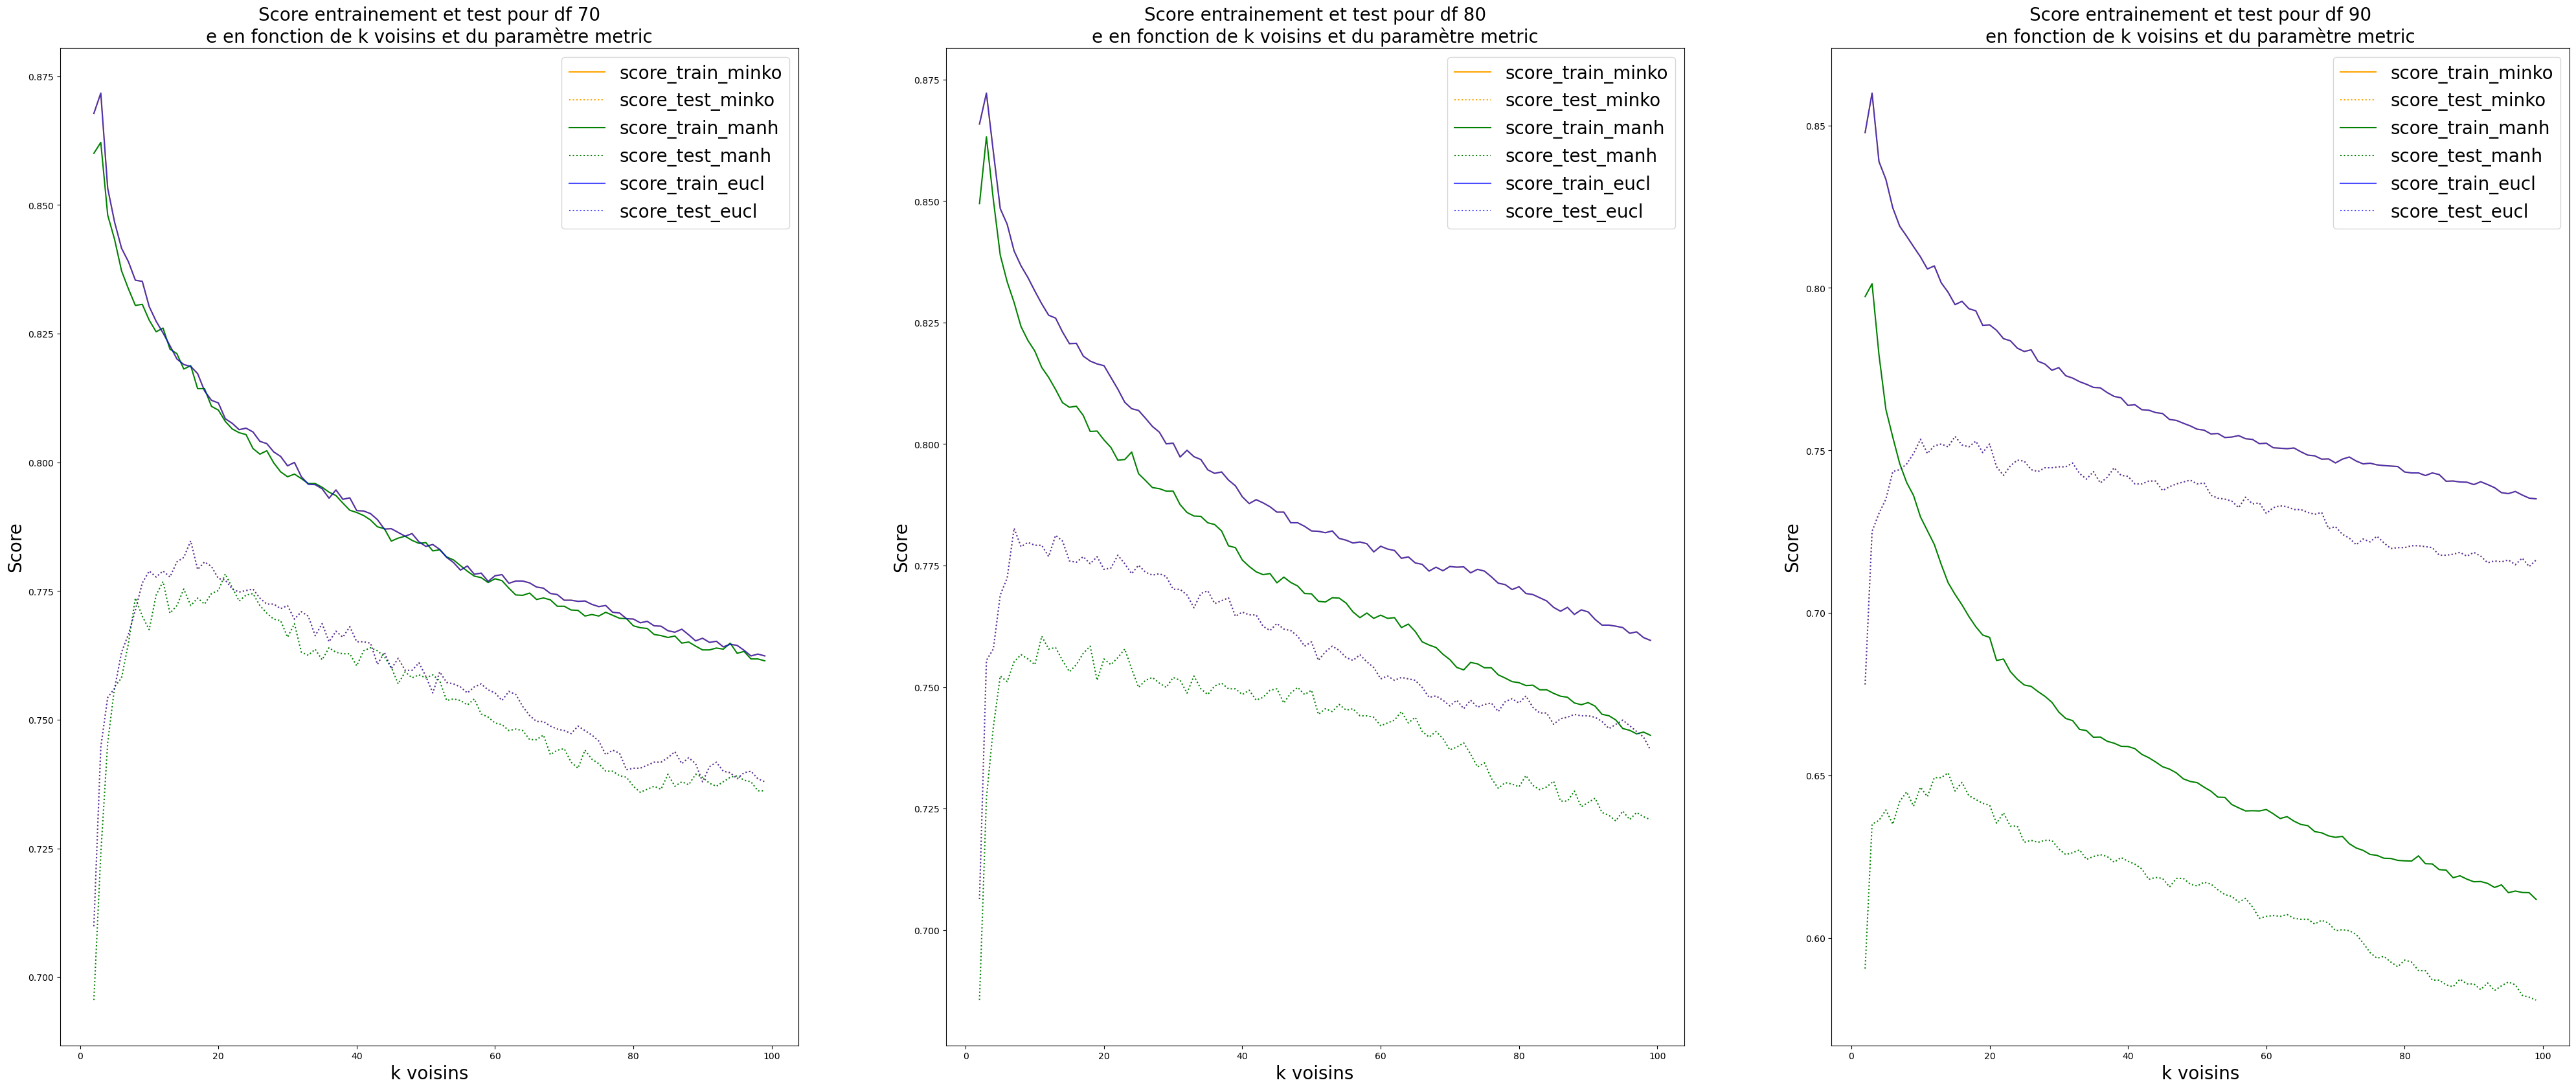

In [ ]:
plt.figure(figsize=(50,20))

#Graphe PCA 0.7
plt.subplot(1,3,1)
plt.plot(range(2,100), score_train_minko, color='orange', label='score_train_minko')
plt.plot(range(2,100),score_test_minko, color='orange', linestyle=':', label='score_test_minko')
plt.plot(range(2,100), score_train_manh, color='green', label='score_train_manh')
plt.plot(range(2,100),score_test_manh, color='green', linestyle=':', label='score_test_manh')
plt.plot(range(2,100), score_train_eucl, color='b', label='score_train_eucl', alpha =0.7)
plt.plot(range(2,100),score_test_eucl, color='b', linestyle=':', label='score_test_eucl', alpha =0.7)
plt.title('Score entrainement et test pour df 70\nen fonction de k voisins et du paramètre metric',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);


#Graphe PCA 0.8
plt.subplot(1,3,2)
plt.plot(range(2,100), score_train_minko80, color='orange', label='score_train_minko')
plt.plot(range(2,100),score_test_minko80, color='orange', linestyle=':', label='score_test_minko')
plt.plot(range(2,100), score_train_manh80, color='green', label='score_train_manh')
plt.plot(range(2,100),score_test_manh80, color='green', linestyle=':', label='score_test_manh')
plt.plot(range(2,100), score_train_eucl80, color='b', label='score_train_eucl', alpha =0.7)
plt.plot(range(2,100),score_test_eucl80, color='b', linestyle=':', label='score_test_eucl', alpha =0.7)
plt.title('Score entrainement et test pour df 80\nen fonction de k voisins et du paramètre metric',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);


#Graphe PCA 0.9
plt.subplot(1,3,3)
plt.plot(range(2,100), score_train_minko90, color='orange', label='score_train_minko')
plt.plot(range(2,100),score_test_minko90, color='orange', linestyle=':', label='score_test_minko')
plt.plot(range(2,100), score_train_manh90, color='green', label='score_train_manh')
plt.plot(range(2,100),score_test_manh90, color='green', linestyle=':', label='score_test_manh')
plt.plot(range(2,100), score_train_eucl90, color='b', label='score_train_eucl', alpha =0.7)
plt.plot(range(2,100),score_test_eucl90, color='b', linestyle=':', label='score_test_eucl', alpha =0.7)
plt.title('Score entrainement et test pour df 90\nen fonction de k voisins et du paramètre metric',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);



In [ ]:
print ('score max pour 0.7, 0.8, 0.9, courbe test minkowski : ', 
       max(score_test_minko).round(5),max(score_test_minko90).round(5),max(score_test_minko90).round(5) )


score max pour 0.7, 0.8, 0.9, courbe test minkowski :  0.78473 0.75431 0.75431


#### Tentative d'amélioration des scores en changeant le poids donné aux voisins proches de chaque point 

Le test euclidien par défaut de KNN ayant donné les meilleurs résultat, c'est celui que l'on réutilise.

In [ ]:
#Fit du modèle avec pondérations et calcul des scores :
score_train_minko_pds =[]
score_test_minko_pds=[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k,weights='distance')
    knn.fit(X_train70, y_train70)
    score_train_minko_pds.append(knn.score(X_train70, y_train70))
    score_test_minko_pds.append(knn.score(X_test70, y_test70))

In [ ]:
score_train_minko80_pds =[]
score_test_minko80_pds=[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k,weights='distance')
    knn.fit(X_train80, y_train80)
    score_train_minko80_pds.append(knn.score(X_train80, y_train80))
    score_test_minko80_pds.append(knn.score(X_test80, y_test80))

In [ ]:
score_train_minko90_pds =[]
score_test_minko90_pds=[]
for k in range (2,100):
    knn90_non_norm = KNeighborsClassifier(n_neighbors = k,weights='distance')
    knn90_non_norm.fit(X_train90, y_train90)
    score_train_minko90_pds.append(knn90_non_norm.score(X_train90, y_train90))
    score_test_minko90_pds.append(knn90_non_norm.score(X_test90, y_test90))

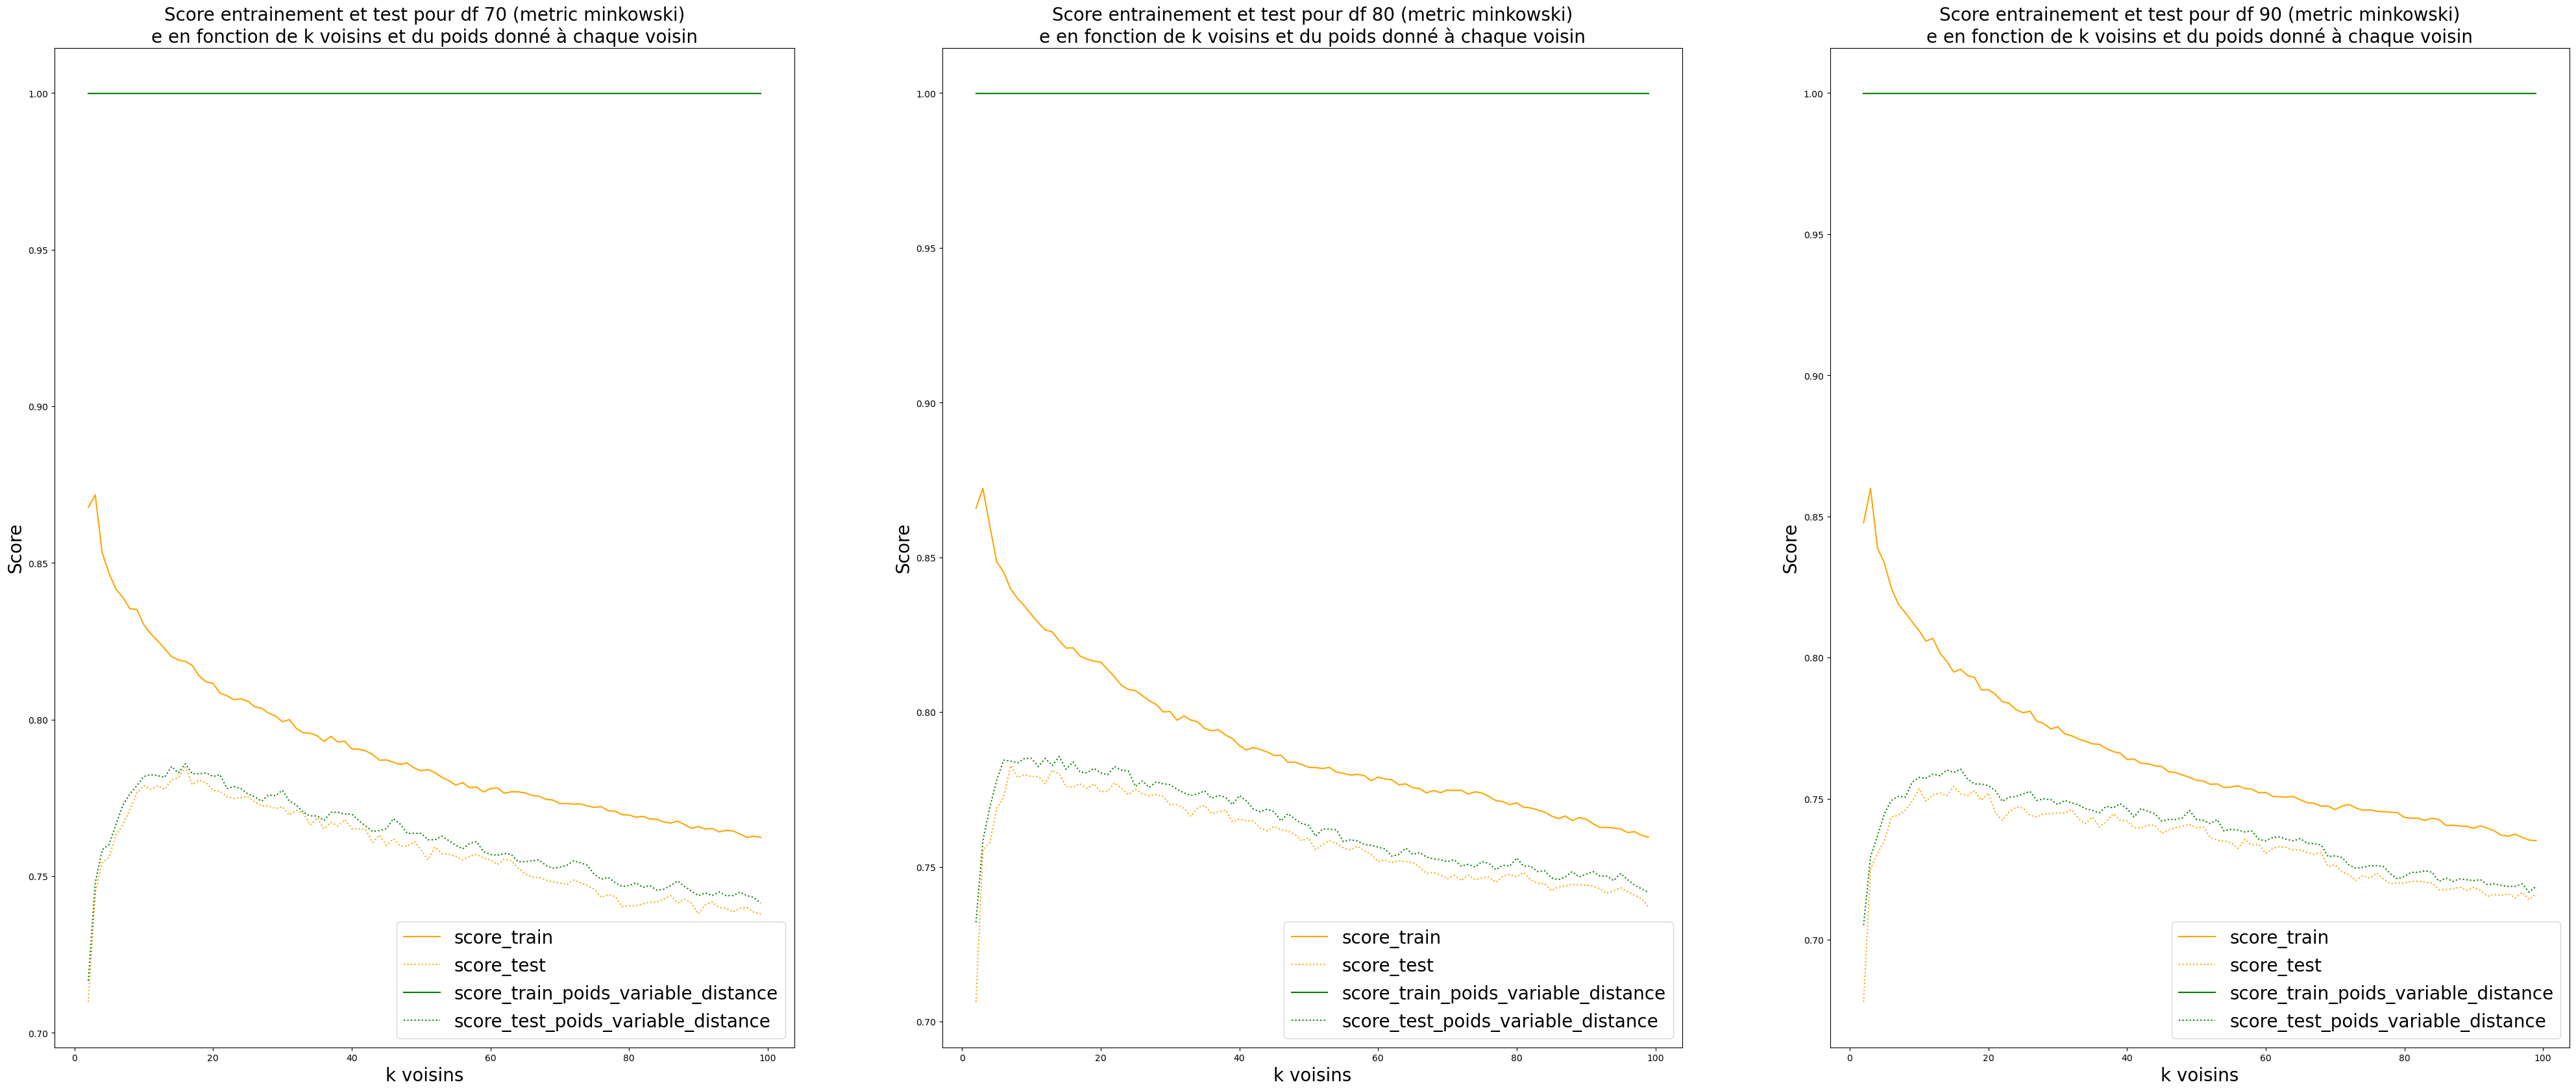

In [ ]:
#Affichage des résultats pour comparaison

plt.figure(figsize=(50,20))

#Graphe PCA 0.7
plt.subplot(1,3,1)
plt.plot(range(2,100), score_train_minko, color='orange', label='score_train')
plt.plot(range(2,100),score_test_minko, color='orange', linestyle=':', label='score_test')
plt.plot(range(2,100), score_train_minko_pds, color='green', label='score_train_poids_variable_distance')
plt.plot(range(2,100),score_test_minko_pds, color='green', linestyle=':', label='score_test_poids_variable_distance')
plt.title('Score entrainement et test pour df 70 (metric minkowski)\ne en fonction de k voisins et du poids donné à chaque voisin',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);

#Graphe PCA 0.8
plt.subplot(1,3,2)
plt.plot(range(2,100), score_train_minko80, color='orange', label='score_train')
plt.plot(range(2,100),score_test_minko80, color='orange', linestyle=':', label='score_test')
plt.plot(range(2,100), score_train_minko80_pds, color='green', label='score_train_poids_variable_distance')
plt.plot(range(2,100),score_test_minko80_pds, color='green', linestyle=':', label='score_test_poids_variable_distance')
plt.title('Score entrainement et test pour df 80 (metric minkowski)\ne en fonction de k voisins et du poids donné à chaque voisin',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);

#Graphe PCA 0.9
plt.subplot(1,3,3)
plt.plot(range(2,100), score_train_minko90, color='orange', label='score_train')
plt.plot(range(2,100),score_test_minko90, color='orange', linestyle=':', label='score_test')
plt.plot(range(2,100), score_train_minko90_pds, color='green', label='score_train_poids_variable_distance')
plt.plot(range(2,100),score_test_minko90_pds, color='green', linestyle=':', label='score_test_poids_variable_distance')
plt.title('Score entrainement et test pour df 90 (metric minkowski)\ne en fonction de k voisins et du poids donné à chaque voisin',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);


On observe un overfitting total

Pour plus de lisibilité, seules les courbes de score sur les données test sont présentées ci-dessous : 

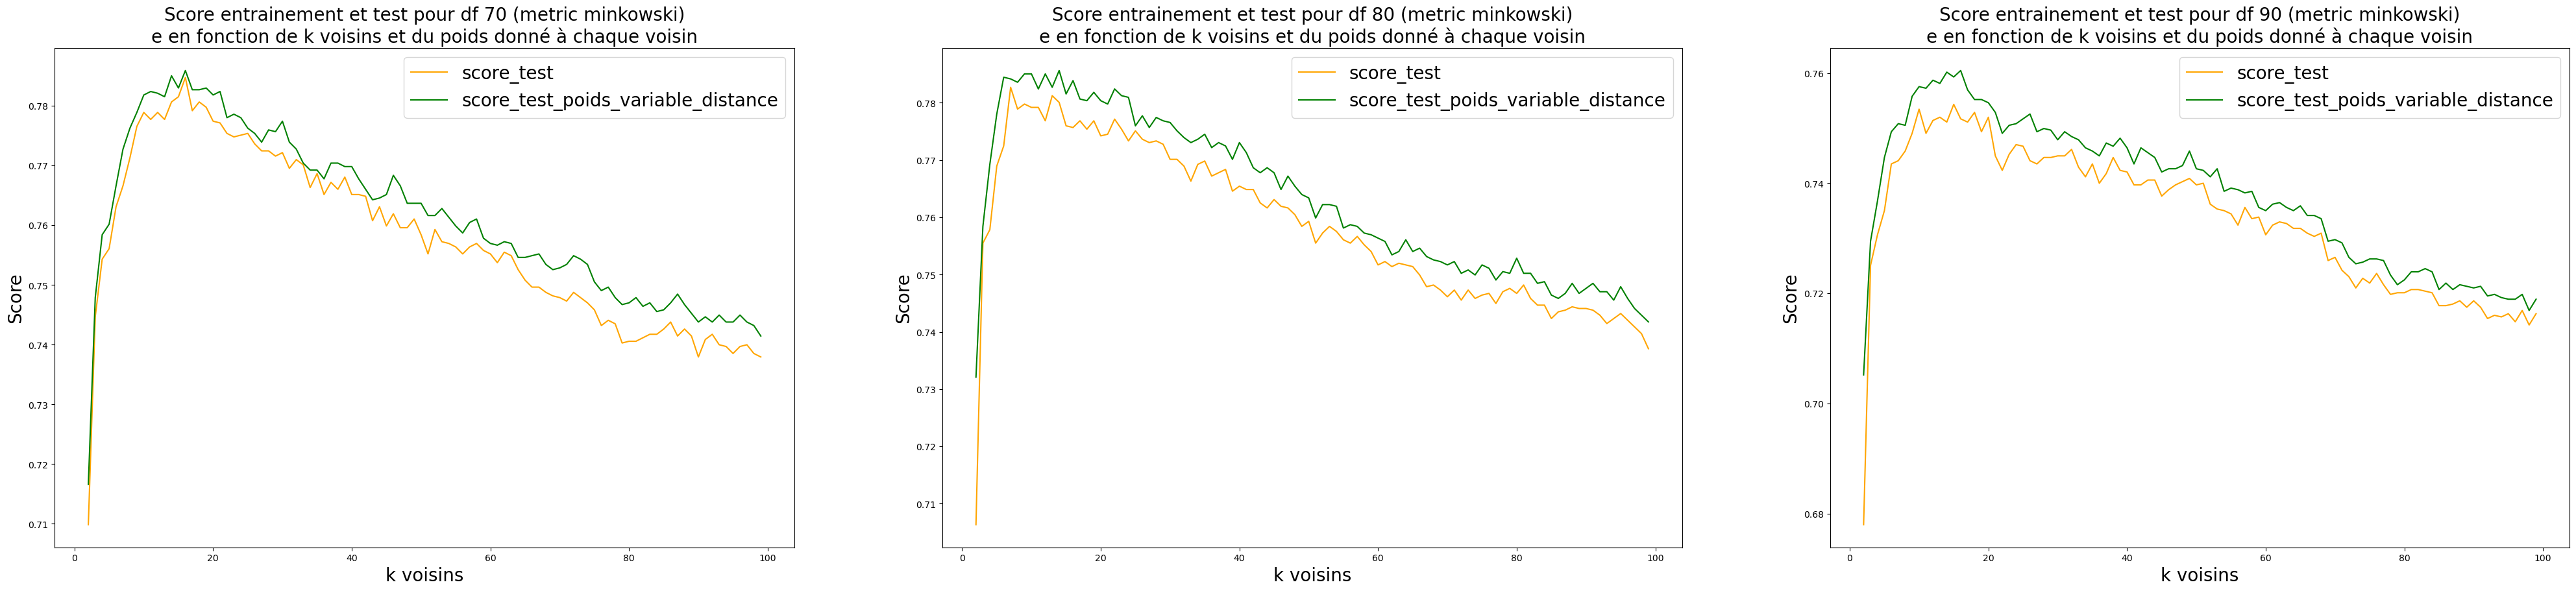

In [ ]:
plt.figure(figsize=(50,10))

#Graphe PCA 0.7
plt.subplot(1,3,1)
plt.plot(range(2,100),score_test_minko, color='orange', label='score_test')
plt.plot(range(2,100),score_test_minko_pds, color='green',  label='score_test_poids_variable_distance')
plt.title('Score test pour df 70 (metric minkowski)\ne en fonction de k voisins et du poids donné à chaque voisin',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);

#Graphe PCA 0.8
plt.subplot(1,3,2)
plt.plot(range(2,100),score_test_minko80, color='orange', label='score_test')
plt.plot(range(2,100),score_test_minko80_pds, color='green', label='score_test_poids_variable_distance')
plt.title('Score test pour df 80 (metric minkowski)\ne en fonction de k voisins et du poids donné à chaque voisin',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);

#Graphe PCA 0.9
plt.subplot(1,3,3)
plt.plot(range(2,100),score_test_minko90, color='orange', label='score_test')
plt.plot(range(2,100),score_test_minko90_pds, color='green', label='score_test_poids_variable_distance')
plt.title('Score test pour df 90 (metric minkowski)\ne en fonction de k voisins et du poids donné à chaque voisin',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);


In [ ]:
print ('score max pour 0.7, 0.8, 0.9 : ', 
       max(score_test_minko_pds).round(5),max(score_test_minko90_pds).round(5),max(score_test_minko90_pds).round(5),
       'pour k=', score_test_minko_pds.index(max(score_test_minko_pds))+2,score_test_minko80_pds.index(max(score_test_minko80_pds))+2,score_test_minko90_pds.index(max(score_test_minko90_pds))+2, '.',
      "\nL'amélioration est très faible.")

print("\nParadoxalement, les images les plus réduites donnent le meilleur score d'accuracy")

score max pour 0.7, 0.8, 0.9 :  0.7859 0.76046 0.76046 pour k= 16 14 16 . 
L'amélioration est très faible.

Paradoxalement, les images les plus réduites donnent le meilleur score d'accuracy


### KNN sur données normalisées
1.   k allant de 2 à 100
2.   3 métrics = minkowsky, manhattan, euclidienne
3.   Représentation graphique des scores train et test obtenu (*évaluation overfitting en fonction des paramètres et du meilleur score*)


#### KNN sur df70
*Données normalisées*

In [ ]:
score_train_minko =[]
score_test_minko=[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train70_sc, y_train70)
    score_train_minko.append(knn.score(X_train70_sc, y_train70))
    score_test_minko.append(knn.score(X_test70_sc, y_test70))

In [ ]:
score_train_manh =[]
score_test_manh=[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k, metric='manhattan')
    knn.fit(X_train70_sc, y_train70)
    score_train_manh.append(knn.score(X_train70_sc, y_train70))
    score_test_manh.append(knn.score(X_test70_sc, y_test70))

In [ ]:
score_train_eucl =[]
score_test_eucl=[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    knn.fit(X_train70_sc, y_train70)
    score_train_eucl.append(knn.score(X_train70_sc, y_train70))
    score_test_eucl.append(knn.score(X_test70_sc, y_test70))

#### KNN sur df80
*Données normalisées*

In [ ]:
score_train_minko80 =[]
score_test_minko80=[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train80_sc, y_train80)
    score_train_minko80.append(knn.score(X_train80_sc, y_train80))
    score_test_minko80.append(knn.score(X_test80_sc, y_test80))

In [ ]:
score_train_manh80 =[]
score_test_manh80=[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k, metric='manhattan')
    knn.fit(X_train80_sc, y_train80)
    score_train_manh80.append(knn.score(X_train80_sc, y_train80))
    score_test_manh80.append(knn.score(X_test80_sc, y_test80))

In [ ]:
score_train_eucl80 =[]
score_test_eucl80 =[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    knn.fit(X_train80_sc, y_train80)
    score_train_eucl80.append(knn.score(X_train80_sc, y_train80))
    score_test_eucl80.append(knn.score(X_test80_sc, y_test80))

#### KNN sur df90
*Données normalisées*

In [ ]:
score_train_minko90 =[]
score_test_minko90=[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train90_sc, y_train90)
    score_train_minko90.append(knn.score(X_train90_sc, y_train90))
    score_test_minko90.append(knn.score(X_test90_sc, y_test90))

In [ ]:
score_train_manh90 =[]
score_test_manh90=[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k, metric='manhattan')
    knn.fit(X_train90_sc, y_train90)
    score_train_manh90.append(knn.score(X_train90_sc, y_train90))
    score_test_manh90.append(knn.score(X_test90_sc, y_test90))

In [ ]:
score_train_eucl90 =[]
score_test_eucl90 =[]
for k in range (2,100):
    knn = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
    knn.fit(X_train90_sc, y_train90)
    score_train_eucl90.append(knn.score(X_train90_sc, y_train90))
    score_test_eucl90.append(knn.score(X_test90_sc, y_test90))

#### Représentation graphique pour chaque PCA sur données normalisées

In [ ]:
plt.figure(figsize=(50,20))

#Graphe PCA 0.7
plt.subplot(1,3,1)
plt.plot(range(2,100), score_train_minko, color='orange', label='score_train_minko')
plt.plot(range(2,100),score_test_minko, color='orange', linestyle=':', label='score_test_minko')
plt.plot(range(2,100), score_train_manh, color='green', label='score_train_manh')
plt.plot(range(2,100),score_test_manh, color='green', linestyle=':', label='score_test_manh')
plt.plot(range(2,100), score_train_eucl, color='b', label='score_train_eucl', alpha =0.7)
plt.plot(range(2,100),score_test_eucl, color='b', linestyle=':', label='score_test_eucl', alpha =0.7)
plt.title('Score entrainement et test pour df 70\ne en fonction de k voisins et du paramètre metric',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);

#Graphe PCA 0.8
plt.subplot(1,3,2)
plt.plot(range(2,100), score_train_minko80, color='orange', label='score_train_minko')
plt.plot(range(2,100),score_test_minko80, color='orange', linestyle=':', label='score_test_minko')
plt.plot(range(2,100), score_train_manh80, color='green', label='score_train_manh')
plt.plot(range(2,100),score_test_manh80, color='green', linestyle=':', label='score_test_manh')
plt.plot(range(2,100), score_train_eucl80, color='b', label='score_train_eucl', alpha =0.7)
plt.plot(range(2,100),score_test_eucl80, color='b', linestyle=':', label='score_test_eucl', alpha =0.7)
plt.title('Score entrainement et test pour df 80\ne en fonction de k voisins et du paramètre metric',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);

#Graphe PCA 0.9
plt.subplot(1,3,3)
plt.plot(range(2,100), score_train_minko90, color='orange', label='score_train_minko')
plt.plot(range(2,100),score_test_minko90, color='orange', linestyle=':', label='score_test_minko')
plt.plot(range(2,100), score_train_manh90, color='green', label='score_train_manh')
plt.plot(range(2,100),score_test_manh90, color='green', linestyle=':', label='score_test_manh')
plt.plot(range(2,100), score_train_eucl90, color='b', label='score_train_eucl', alpha =0.7)
plt.plot(range(2,100),score_test_eucl90, color='b', linestyle=':', label='score_test_eucl', alpha =0.7)
plt.title('Score entrainement et test pour df 90\nen fonction de k voisins et du paramètre metric',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);


In [ ]:
print ('score max pour 0.7, 0.8, 0.9, courbe test minkowski : ', 
       max(score_test_minko).round(5),max(score_test_minko80).round(5),max(score_test_minko90).round(5) )

Amélioration des scores.

Le test euclidien par défaut de KNN ayant donné les meilleurs résultat, c'est celui que l'on réutilise.

In [ ]:
#Fit du modèle avec pondérations et calcul des scores :
score_train_minko_pds =[]
score_test_minko_pds=[]
for k in range (2,100):
    knn70 = KNeighborsClassifier(n_neighbors = k,weights='distance')
    knn70.fit(X_train70_sc, y_train70)
    score_train_minko_pds.append(knn70.score(X_train70_sc, y_train70))
    score_test_minko_pds.append(knn70.score(X_test70_sc, y_test70))

In [ ]:
score_train_minko80_pds =[]
score_test_minko80_pds=[]
for k in range (2,100):
    knn80 = KNeighborsClassifier(n_neighbors = k,weights='distance')
    knn80.fit(X_train80_sc, y_train80)
    score_train_minko80_pds.append(knn80.score(X_train80_sc, y_train80))
    score_test_minko80_pds.append(knn80.score(X_test80_sc, y_test80))

In [ ]:
score_train_minko90_pds =[]
score_test_minko90_pds=[]
for k in range (2,100):
    knn90 = KNeighborsClassifier(n_neighbors = k,weights='distance')
    knn90.fit(X_train90_sc, y_train90)
    score_train_minko90_pds.append(knn90.score(X_train90_sc, y_train90))
    score_test_minko90_pds.append(knn90.score(X_test90_sc, y_test90))

In [ ]:
#Affichage des résultats pour comparaison

plt.figure(figsize=(50,20))

#Graphe PCA 0.7
plt.subplot(1,3,1)
plt.plot(range(2,100), score_train_minko, color='orange', label='score_train', lw=3)
plt.plot(range(2,100),score_test_minko, color='orange', linestyle=':', label='score_test', lw=3)
plt.plot(range(2,100), score_train_minko_pds, color='green', label='score_train_poids_variable_distance', lw=3)
plt.plot(range(2,100),score_test_minko_pds, color='green', linestyle=':', label='score_test_poids_variable_distance', lw=3)
plt.title('Score entrainement et test pour df 70 (metric minkowski)\ne en fonction de k voisins et du poids donné à chaque voisin',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);

#Graphe PCA 0.8
plt.subplot(1,3,2)
plt.plot(range(2,100), score_train_minko80, color='orange', label='score_train', lw=3)
plt.plot(range(2,100),score_test_minko80, color='orange', linestyle=':', label='score_test', lw=3)
plt.plot(range(2,100), score_train_minko80_pds, color='green', label='score_train_poids_variable_distance', lw=3)
plt.plot(range(2,100),score_test_minko80_pds, color='green', linestyle=':', label='score_test_poids_variable_distance', lw=3)
plt.title('Score entrainement et test pour df 80 (metric minkowski)\ne en fonction de k voisins et du poids donné à chaque voisin',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);


#Graphe PCA 0.9
plt.subplot(1,3,3)
plt.plot(range(2,100), score_train_minko90, color='orange', label='score_train', lw=3)
plt.plot(range(2,100),score_test_minko90, color='orange', linestyle=':', label='score_test', lw=3)
plt.plot(range(2,100), score_train_minko90_pds, color='green', label='score_train_poids_variable_distance', lw=3)
plt.plot(range(2,100),score_test_minko90_pds, color='green', linestyle=':', label='score_test_poids_variable_distance', lw=3)
plt.title('Score entrainement et test pour df 90 (metric minkowski)\ne en fonction de k voisins et du poids donné à chaque voisin',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);



In [ ]:
print ('score max pour 0.7, 0.8, 0.9, courbe test minkowski : ', 
       max(score_test_minko_pds).round(5),max(score_test_minko80_pds).round(5),max(score_test_minko90_pds).round(5) )

score max pour 0.7, 0.8, 0.9, courbe test minkowski :  0.75402 0.66189 0.29599


In [ ]:
#Représentation des données test
plt.figure(figsize=(50,10))

#Graphe PCA 0.7
plt.subplot(1,3,1)
#plt.plot(range(2,100),score_test_minko, color='orange', label='score_test')
plt.plot(range(2,100),score_test_minko_pds, color='green',  label='score_test_poids_variable_distance')
plt.title('Score entrainement et test pour df 70 (metric minkowski)\ne en fonction de k voisins et du poids donné à chaque voisin',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);


#Graphe PCA 0.8
plt.subplot(1,3,2)
#plt.plot(range(2,100),score_test_minko80, color='orange', label='score_test')
plt.plot(range(2,100),score_test_minko80_pds, color='green', label='score_test_poids_variable_distance')
plt.title('Score entrainement et test pour df 80 (metric minkowski)\ne en fonction de k voisins et du poids donné à chaque voisin',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);

#Graphe PCA 0.9
plt.subplot(1,3,3)
#plt.plot(range(2,100),score_test_minko90, color='orange', label='score_test')
plt.plot(range(2,100),score_test_minko90_pds, color='green', label='score_test_poids_variable_distance')
plt.title('Score entrainement et test pour df 90 (metric minkowski)\ne en fonction de k voisins et du poids donné à chaque voisin',fontsize = 30)
plt.xlabel('k voisins',fontsize = 25)
plt.ylabel('Score',fontsize = 25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 25);

In [ ]:
print ('score max pour 0.7, 0.8, 0.9 : ', 
       max(score_test_minko_pds).round(5),max(score_test_minko80_pds).round(5),max(score_test_minko90_pds).round(5),
       'pour k=', score_test_minko_pds.index(max(score_test_minko_pds))+2,score_test_minko80_pds.index(max(score_test_minko80_pds))+2,score_test_minko90_pds.index(max(score_test_minko90_pds))+2, '.',
      "\nL'amélioration est très faible.")

print("\nParadoxalement, les images les plus réduites donnent le meilleur score d'accuracy")

#### Analyses des résultats

*Matrice de confusion et classification_report*

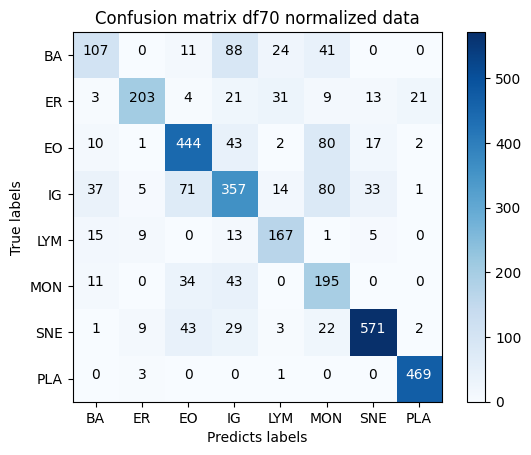

In [ ]:
cnf_matrix = confusion_matrix(y_test70, knn70.predict(X_test70_sc))

classes = ['BA', 'ER','EO','IG','LYM','MON','SNE','PLA']

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df70 normalized data")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predicts labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print('Df70 classification report (normalized data) :\n\n', classification_report(y_test70, knn70.predict(X_test70_sc)))

Df70 classification report (normalized data) :

               precision    recall  f1-score   support

           1       0.58      0.39      0.47       271
           2       0.88      0.67      0.76       305
           3       0.73      0.74      0.74       599
           4       0.60      0.60      0.60       598
           5       0.69      0.80      0.74       210
           6       0.46      0.69      0.55       283
           7       0.89      0.84      0.87       680
           8       0.95      0.99      0.97       473

    accuracy                           0.74      3419
   macro avg       0.72      0.71      0.71      3419
weighted avg       0.75      0.74      0.74      3419



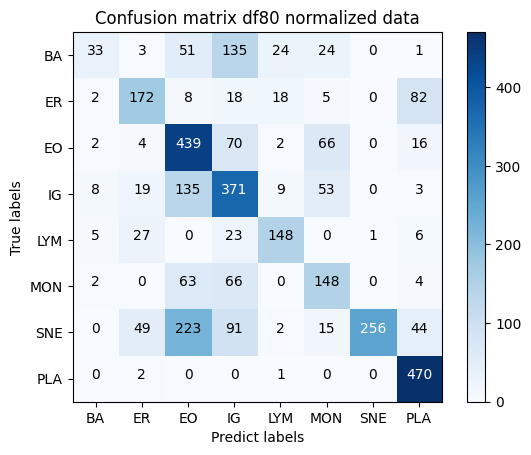

In [ ]:
cnf_matrix = confusion_matrix(y_test80, knn80.predict(X_test80_sc))

classes = ['BA', 'ER','EO','IG','LYM','MON','SNE','PLA']

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df80 normalized data")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predict labels')
plt.show()

In [ ]:
print('Df80 classification report (normalized data) :\n\n', classification_report(y_test80, knn80.predict(X_test80_sc)))

Df80 classification report (normalized data) :

               precision    recall  f1-score   support

           1       0.63      0.12      0.20       271
           2       0.62      0.56      0.59       305
           3       0.48      0.73      0.58       599
           4       0.48      0.62      0.54       598
           5       0.73      0.70      0.71       210
           6       0.48      0.52      0.50       283
           7       1.00      0.38      0.55       680
           8       0.75      0.99      0.86       473

    accuracy                           0.60      3419
   macro avg       0.65      0.58      0.57      3419
weighted avg       0.66      0.60      0.58      3419



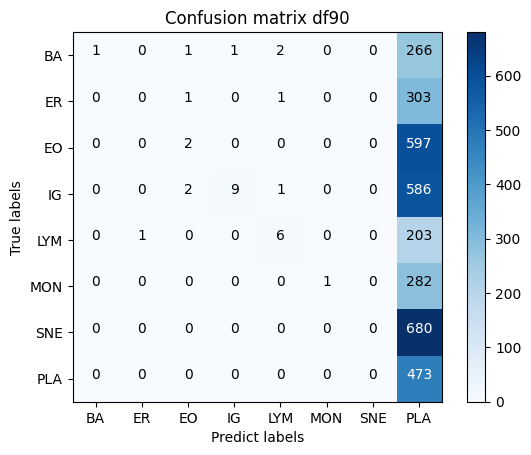

In [ ]:
cnf_matrix = confusion_matrix(y_test90, knn90.predict(X_test90_sc))

classes = ['BA', 'ER','EO','IG','LYM','MON','SNE','PLA']

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df90")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predict labels')
plt.show()

In [ ]:
print('Df90 classification report  (normalized data) :\n\n', classification_report(y_test90, knn90.predict(X_test90_sc)))

Df90 classification report  (normalized data) :

               precision    recall  f1-score   support

           1       1.00      0.00      0.01       271
           2       0.00      0.00      0.00       305
           3       0.33      0.00      0.01       599
           4       0.90      0.02      0.03       598
           5       0.60      0.03      0.05       210
           6       1.00      0.00      0.01       283
           7       0.00      0.00      0.00       680
           8       0.14      1.00      0.24       473

    accuracy                           0.14      3419
   macro avg       0.50      0.13      0.04      3419
weighted avg       0.43      0.14      0.04      3419



/home/juliacnc/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/juliacnc/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/juliacnc/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Comparaison des résultats des df90 normalisé et non normalisé

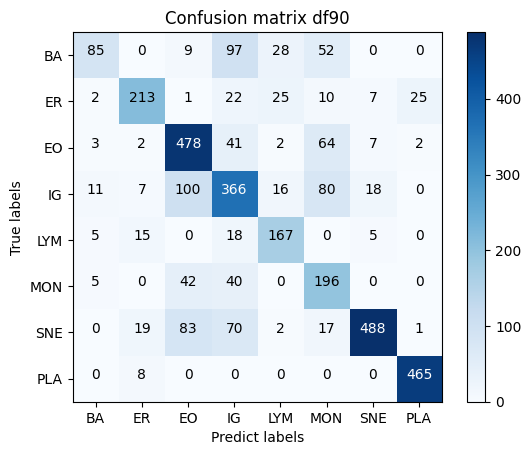

In [ ]:
cnf_matrix = confusion_matrix(y_test90, knn90_non_norm.predict(X_test90))

classes = ['BA', 'ER','EO','IG','LYM','MON','SNE','PLA']

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df90")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predict labels')
plt.show()

In [ ]:
print('Df90 classification report  (normalized data) :\n\n', classification_report(y_test90, knn90_non_norm.predict(X_test90)))

Df90 classification report  (normalized data) :

               precision    recall  f1-score   support

           1       0.77      0.31      0.45       271
           2       0.81      0.70      0.75       305
           3       0.67      0.80      0.73       599
           4       0.56      0.61      0.58       598
           5       0.70      0.80      0.74       210
           6       0.47      0.69      0.56       283
           7       0.93      0.72      0.81       680
           8       0.94      0.98      0.96       473

    accuracy                           0.72      3419
   macro avg       0.73      0.70      0.70      3419
weighted avg       0.74      0.72      0.72      3419



### Régression linéaire




#### 1er GridSearch avec cv = 3

In [ ]:
#Création du gridsearch
clf_lr=LogisticRegression(max_iter=10000) #utilisé pour la comparaison de différents paramètres dans les cellules ci-dessous
#clf_lr=LogisticRegression(max_iter=50000) #utilisé pour l'utilisation combiné avec un knn, voir dernier paragraphe de ce notebook VotingClassifier
params_lr={'solver': ['liblinear','lbfgs'],'C': [10**(i)for i in range(-4,3)]}


In [ ]:
#gridcv sur PCA 0.7 
gridcv_lr3_70=GridSearchCV(clf_lr,param_grid=params_lr,scoring='accuracy',cv=3)
gridcv_lr3_70.fit(X_train70_sc,y_train70)
lr70_cv3=pd.DataFrame(gridcv_lr3_70.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']]
lr70_cv3

,params,mean_test_score,std_test_score,rank_test_score
0,"{'C': 0.0001, 'solver': 'liblinear'}",0.193739,0.000020,13
1,"{'C': 0.0001, 'solver': 'lbfgs'}",0.193739,0.000020,13
2,"{'C': 0.001, 'solver': 'liblinear'}",0.205588,0.000460,12
3,"{'C': 0.001, 'solver': 'lbfgs'}",0.250859,0.000739,11
4,"{'C': 0.01, 'solver': 'liblinear'}",0.491699,0.006405,10
5,"{'C': 0.01, 'solver': 'lbfgs'}",0.510641,0.003255,9
6,"{'C': 0.1, 'solver': 'liblinear'}",0.608936,0.008992,8
7,"{'C': 0.1, 'solver': 'lbfgs'}",0.640166,0.006142,7
8,"{'C': 1, 'solver': 'liblinear'}",0.648577,0.003863,6
9,"{'C': 1, 'solver': 'lbfgs'}",0.684488,0.001568,3


In [ ]:
#gridcv sur PCA 0.8 
gridcv_lr3_80=GridSearchCV(clf_lr,param_grid=params_lr,scoring='accuracy',cv=3)
gridcv_lr3_80.fit(X_train80_sc,y_train80)
lr80_cv3=pd.DataFrame(gridcv_lr3_80.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']]
lr80_cv3

,params,mean_test_score,std_test_score,rank_test_score
0,"{'C': 0.0001, 'solver': 'liblinear'}",0.193739,0.000020,13
1,"{'C': 0.0001, 'solver': 'lbfgs'}",0.193739,0.000020,13
2,"{'C': 0.001, 'solver': 'liblinear'}",0.220215,0.001618,12
3,"{'C': 0.001, 'solver': 'lbfgs'}",0.253419,0.002043,11
4,"{'C': 0.01, 'solver': 'liblinear'}",0.500621,0.007011,10
5,"{'C': 0.01, 'solver': 'lbfgs'}",0.509910,0.004963,9
6,"{'C': 0.1, 'solver': 'liblinear'}",0.609595,0.010301,8
7,"{'C': 0.1, 'solver': 'lbfgs'}",0.636070,0.006771,7
8,"{'C': 1, 'solver': 'liblinear'}",0.644043,0.004743,6
9,"{'C': 1, 'solver': 'lbfgs'}",0.686755,0.002292,3


In [ ]:
#gridcv sur PCA 0.9 
gridcv_lr3_90=GridSearchCV(clf_lr,param_grid=params_lr,scoring='accuracy',cv=3)
gridcv_lr3_90.fit(X_train90_sc,y_train90)
lr90_cv3=pd.DataFrame(gridcv_lr3_90.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']]
lr90_cv3

,params,mean_test_score,std_test_score,rank_test_score
0,"{'C': 0.0001, 'solver': 'liblinear'}",0.193739,0.000020,13
1,"{'C': 0.0001, 'solver': 'lbfgs'}",0.193739,0.000020,13
2,"{'C': 0.001, 'solver': 'liblinear'}",0.228187,0.001240,12
3,"{'C': 0.001, 'solver': 'lbfgs'}",0.254297,0.001447,11
4,"{'C': 0.01, 'solver': 'liblinear'}",0.493600,0.004919,10
5,"{'C': 0.01, 'solver': 'lbfgs'}",0.503108,0.003741,9
6,"{'C': 0.1, 'solver': 'liblinear'}",0.602500,0.010139,8
7,"{'C': 0.1, 'solver': 'lbfgs'}",0.627001,0.008096,6
8,"{'C': 1, 'solver': 'liblinear'}",0.625539,0.004478,7
9,"{'C': 1, 'solver': 'lbfgs'}",0.663351,0.002691,3


Analyse des résultats par matrice de confusion et classification_report

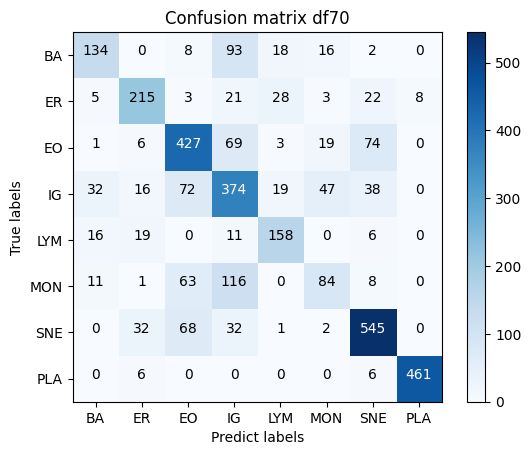

In [ ]:
cnf_matrix = confusion_matrix(y_test70, gridcv_lr3_70.predict(X_test70_sc))

classes = ['BA', 'ER','EO','IG','LYM','MON','SNE','PLA']

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df70")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predict labels')
plt.show()

In [ ]:
print('Df70 classification report :\n\n', classification_report(y_test70, gridcv_lr3_70.predict(X_test70_sc)))

Df70 classification report :

               precision    recall  f1-score   support

           1       0.67      0.49      0.57       271
           2       0.73      0.70      0.72       305
           3       0.67      0.71      0.69       599
           4       0.52      0.63      0.57       598
           5       0.70      0.75      0.72       210
           6       0.49      0.30      0.37       283
           7       0.78      0.80      0.79       680
           8       0.98      0.97      0.98       473

    accuracy                           0.70      3419
   macro avg       0.69      0.67      0.68      3419
weighted avg       0.70      0.70      0.70      3419



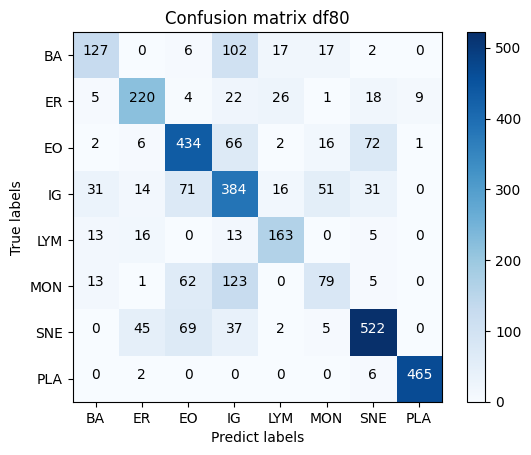

In [ ]:
cnf_matrix = confusion_matrix(y_test80, gridcv_lr3_80.predict(X_test80_sc))

classes = ['BA', 'ER','EO','IG','LYM','MON','SNE','PLA']

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df80")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predict labels')
plt.show()

In [ ]:
print('Df80 classification report :\n\n', classification_report(y_test80, gridcv_lr3_80.predict(X_test80_sc)))

Df80 classification report :

               precision    recall  f1-score   support

           1       0.66      0.47      0.55       271
           2       0.72      0.72      0.72       305
           3       0.67      0.72      0.70       599
           4       0.51      0.64      0.57       598
           5       0.72      0.78      0.75       210
           6       0.47      0.28      0.35       283
           7       0.79      0.77      0.78       680
           8       0.98      0.98      0.98       473

    accuracy                           0.70      3419
   macro avg       0.69      0.67      0.67      3419
weighted avg       0.70      0.70      0.70      3419



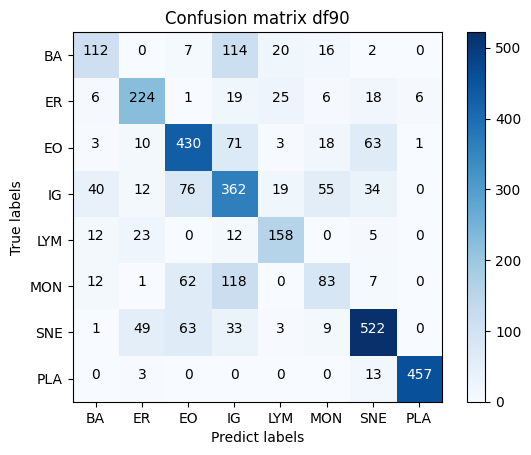

In [ ]:
cnf_matrix = confusion_matrix(y_test90, gridcv_lr3_90.predict(X_test90_sc))

classes = ['BA', 'ER','EO','IG','LYM','MON','SNE','PLA']

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df90")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predict labels')
plt.show()

In [ ]:
print('Df90 classification report :\n\n', classification_report(y_test90, gridcv_lr3_90.predict(X_test90_sc)))

Df90 classification report :

               precision    recall  f1-score   support

           1       0.60      0.41      0.49       271
           2       0.70      0.73      0.71       305
           3       0.67      0.72      0.69       599
           4       0.50      0.61      0.55       598
           5       0.69      0.75      0.72       210
           6       0.44      0.29      0.35       283
           7       0.79      0.77      0.78       680
           8       0.98      0.97      0.98       473

    accuracy                           0.69      3419
   macro avg       0.67      0.66      0.66      3419
weighted avg       0.69      0.69      0.68      3419



#### 2eme GridSearch avec cv = 15

In [ ]:
#Création du gridsearch

clf_lr=LogisticRegression(max_iter=5000)
params_lr={'solver': ['liblinear','lbfgs'],'C': [10**(i)for i in range(-4,3)]}


In [ ]:
#gridcv sur PCA 0.7 
gridcv_lr15_70=GridSearchCV(clf_lr,param_grid=params_lr,scoring='accuracy',cv=15)
gridcv_lr15_70.fit(X_train70_sc,y_train70)
lr70_cv15=pd.DataFrame(gridcv_lr15_70.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']]
lr70_cv15

,params,mean_test_score,std_test_score,rank_test_score
0,"{'C': 0.0001, 'solver': 'liblinear'}",0.193739,0.000448,13
1,"{'C': 0.0001, 'solver': 'lbfgs'}",0.193739,0.000448,13
2,"{'C': 0.001, 'solver': 'liblinear'}",0.305272,0.008504,12
3,"{'C': 0.001, 'solver': 'lbfgs'}",0.350251,0.009865,11
4,"{'C': 0.01, 'solver': 'liblinear'}",0.502523,0.010208,10
5,"{'C': 0.01, 'solver': 'lbfgs'}",0.530169,0.009947,9
6,"{'C': 0.1, 'solver': 'liblinear'}",0.617713,0.014740,8
7,"{'C': 0.1, 'solver': 'lbfgs'}",0.648212,0.012093,7
8,"{'C': 1, 'solver': 'liblinear'}",0.651723,0.011101,6
9,"{'C': 1, 'solver': 'lbfgs'}",0.689387,0.011393,3


In [ ]:
#gridcv sur PCA 0.8 
gridcv_lr15_80=GridSearchCV(clf_lr,param_grid=params_lr,scoring='accuracy',cv=15)
gridcv_lr15_80.fit(X_train80_sc,y_train80)
lr80_cv15=pd.DataFrame(gridcv_lr15_80.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']]
lr80_cv15

,params,mean_test_score,std_test_score,rank_test_score
0,"{'C': 0.0001, 'solver': 'liblinear'}",0.193739,0.000448,13
1,"{'C': 0.0001, 'solver': 'lbfgs'}",0.193739,0.000448,13
2,"{'C': 0.001, 'solver': 'liblinear'}",0.294814,0.007556,12
3,"{'C': 0.001, 'solver': 'lbfgs'}",0.355519,0.007233,11
4,"{'C': 0.01, 'solver': 'liblinear'}",0.516492,0.010407,10
5,"{'C': 0.01, 'solver': 'lbfgs'}",0.542162,0.009383,9
6,"{'C': 0.1, 'solver': 'liblinear'}",0.622028,0.017080,8
7,"{'C': 0.1, 'solver': 'lbfgs'}",0.649674,0.011925,7
8,"{'C': 1, 'solver': 'liblinear'}",0.649822,0.011370,6
9,"{'C': 1, 'solver': 'lbfgs'}",0.693922,0.010835,3


In [ ]:
#gridcv sur PCA 0.9 
gridcv_lr15_90=GridSearchCV(clf_lr,param_grid=params_lr,scoring='accuracy',cv=15)
gridcv_lr15_90.fit(X_train90_sc,y_train90)
lr90_cv15=pd.DataFrame(gridcv_lr15_90.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']]
lr90_cv15

Analyse des résultats par matrice de confusion et classification_report

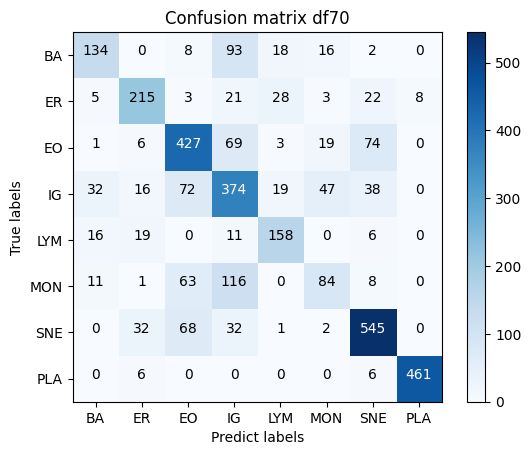

In [ ]:
cnf_matrix = confusion_matrix(y_test70, gridcv_lr15_70.predict(X_test70_sc))

classes = ['BA', 'ER','EO','IG','LYM','MON','SNE','PLA']

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df70")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predict labels')
plt.show()

In [ ]:
print('Df70 classification report :\n\n', classification_report(y_test70, gridcv_lr15_70.predict(X_test70_sc)))

Df70 classification report :

               precision    recall  f1-score   support

           1       0.67      0.49      0.57       271
           2       0.73      0.70      0.72       305
           3       0.67      0.71      0.69       599
           4       0.52      0.63      0.57       598
           5       0.70      0.75      0.72       210
           6       0.49      0.30      0.37       283
           7       0.78      0.80      0.79       680
           8       0.98      0.97      0.98       473

    accuracy                           0.70      3419
   macro avg       0.69      0.67      0.68      3419
weighted avg       0.70      0.70      0.70      3419



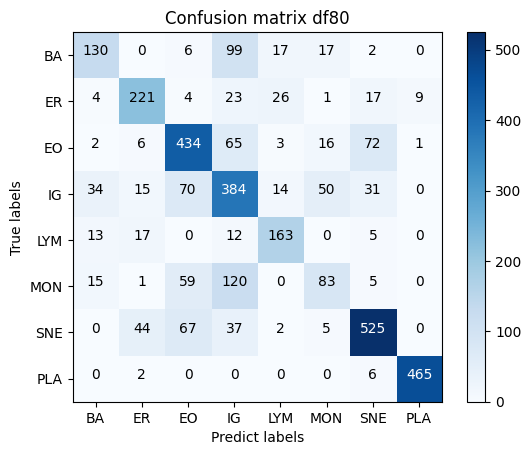

In [ ]:
cnf_matrix = confusion_matrix(y_test80, gridcv_lr15_80.predict(X_test80_sc))

classes = ['BA', 'ER','EO','IG','LYM','MON','SNE','PLA']

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df80")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predict labels')
plt.show()

In [ ]:
print('Df80 classification report :\n\n', classification_report(y_test80, gridcv_lr15_80.predict(X_test80_sc)))

Df80 classification report :

               precision    recall  f1-score   support

           1       0.66      0.48      0.55       271
           2       0.72      0.72      0.72       305
           3       0.68      0.72      0.70       599
           4       0.52      0.64      0.57       598
           5       0.72      0.78      0.75       210
           6       0.48      0.29      0.36       283
           7       0.79      0.77      0.78       680
           8       0.98      0.98      0.98       473

    accuracy                           0.70      3419
   macro avg       0.69      0.67      0.68      3419
weighted avg       0.70      0.70      0.70      3419



In [ ]:
cnf_matrix = confusion_matrix(y_test90, gridcv_lr15_90.predict(X_test90_sc))

classes = ['BA', 'ER','EO','IG','LYM','MON','SNE','PLA']

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df90")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predict labels')
plt.show()

In [ ]:
print('Df90 classification report :\n\n', classification_report(y_test90, gridcv_lr15_90.predict(X_test90_sc)))

### Random Forest

#### 1ers résultats Random Forest

In [21]:
rd = RandomForestClassifier()

In [22]:
#rd PCA 0.7
rd.fit(X_train70, y_train70)
print('Score random forest entrainement :', rd.score(X_train70, y_train70))
print('Score random forest test :', rd.score(X_test70, y_test70))

Score random forest entrainement : 0.9999268631609742
Score random forest test : 0.7610412401286926


In [31]:
##récupération du pikl
#from sklearn.externals import joblib
#import sklearn.externals
#import sklearn.externals as extjoblib
#import joblib
# Print training and test scores
print('Score random forest training:', rd.score(X_train70, y_train70))
print('Score random forest test:', rd.score(X_test70, y_test70))


# Specify the path and filename to save the model
path_to_save = 'D:/Work - Data/Projects/Red Blood Cells/GitHub/PyntOfBlood/random_forest_model_df70.pkl'

# Save the model to the specified path and filename
joblib.dump(rd, path_to_save)

Score random forest training: 0.9999268631609742
Score random forest test: 0.7610412401286926


['D:/Work - Data/Projects/Red Blood Cells/GitHub/PyntOfBlood/random_forest_model_df70.pkl']

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Load the trained model from the pkl file
loaded_model = joblib.load('D:/Work - Data/Projects/Red Blood Cells/GitHub/PyntOfBlood/random_forest_model_df70.pkl')

# Make predictions on the new test data
y_pred = loaded_model.predict(X_new_test)

# Generate the confusion matrix
cm = confusion_matrix(y_new_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate the classification report
cr = classification_report(y_new_test, y_pred)
print("Classification Report:")
print(cr)

In [32]:
#rd PCA 0.8
rd.fit(X_train80, y_train80)
print('Score random forest entrainement :', rd.score(X_train80, y_train80))
print('Score random forest test :', rd.score(X_test80, y_test80))

Score random forest entrainement : 0.9999268631609742
Score random forest test : 0.7391050014624159


In [33]:

# Specify the path and filename to save the model
path_to_save = 'D:/Work - Data/Projects/Red Blood Cells/GitHub/PyntOfBlood/random_forest_model_df80.pkl'

# Save the model to the specified path and filename
joblib.dump(rd, path_to_save)

['D:/Work - Data/Projects/Red Blood Cells/GitHub/PyntOfBlood/random_forest_model_df80.pkl']

In [34]:
#rd PCA 0.9
rd.fit(X_train90, y_train90)
print('Score random forest entrainement :', rd.score(X_train90, y_train90))
print('Score random forest test :', rd.score(X_test90, y_test90))

Score random forest entrainement : 0.9999268631609742
Score random forest test : 0.6800233986545774


In [35]:

# Specify the path and filename to save the model
path_to_save = 'D:/Work - Data/Projects/Red Blood Cells/GitHub/PyntOfBlood/random_forest_model_df90.pkl'

# Save the model to the specified path and filename
joblib.dump(rd, path_to_save)

['D:/Work - Data/Projects/Red Blood Cells/GitHub/PyntOfBlood/random_forest_model_df90.pkl']

Analyse des résultats par matrice de confusion et classification_report

In [36]:
cnf_matrix = confusion_matrix(y_test70, rd.predict(X_test70_sc))

classes = ['BA', 'ER','EO','IG','LYM','MON','SNE','PLA']

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df70")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predict labels')
plt.show()

d:\App_Data\Anaconda\envs\Python20\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 22 features, but RandomForestClassifier is expecting 236 features as input.

In [ ]:
print('Df70 classification report :\n\n', classification_report(y_test70, rd.predict(X_test70_sc)))

In [ ]:
cnf_matrix = confusion_matrix(y_test80, rd.predict(X_test80_sc))

classes = ['BA', 'ER','EO','IG','LYM','MON','SNE','PLA']

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df80")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predict labels')
plt.show()

In [37]:
print('Df80 classification report :\n\n', classification_report(y_test80, rd.predict(X_test80_sc)))

d:\App_Data\Anaconda\envs\Python20\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 60 features, but RandomForestClassifier is expecting 236 features as input.

In [ ]:
cnf_matrix = confusion_matrix(y_test90, rd.predict(X_test90_sc))

classes = ['BA', 'ER','EO','IG','LYM','MON','SNE','PLA']

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df90")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predict labels')
plt.show()

In [ ]:
print('Df90 classification report :\n\n', classification_report(y_test90, rd.predict(X_test90_sc)))

#### Amélioration Random Forest

In [ ]:
#Création du gridsearch
params_rd = {'n_estimators':[i for i in range(100,1000,10)], 'max_depth': [k for k in range(1,100,5)]}
gridcv=GridSearchCV(rd,param_grid=params_rd,scoring=['accuracy'],refit='accuracy')

#Malgré plusieurs tentatives, il n'a pas été possible d'obtenir des résultats pour les cellules ci-dessous : 
#elles ont été transformées en cellules markdown pour ne pas gêner le déroulement du code, en attendant une solution

#gridcv sur PCA 0.7 
gridcv.fit(X_train70_sc,y_train70)
pd.DataFrame(gridcv.cv_results_)[['params','mean_test_score','std_test_score']]

#gridcv sur PCA 0.8 
gridcv.fit(X_train80,y_train80)
pd.DataFrame(gridcv.cv_results_)[['params','mean_test_score','std_test_score']]

#gridcv sur PCA 0.9 
gridcv.fit(X_train90,y_train90)
pd.DataFrame(gridcv.cv_results_)[['params','mean_test_score','std_test_score']]

Analyse des résultats par matrice de confusion et classification_report

from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test70, gridcv.predict(X_test70_sc))

classes = ['BA', 'ER','EO','IG','LYM','MON','SNE','PLA']

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df70")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predict labels')
plt.show()

print('Df70 classification report :\n\n', classification_report(y_test70, gridcv.predict(X_test70_sc)))

cnf_matrix = confusion_matrix(y_test80, gridcv.predict(X_test80_sc))

classes = ['BA', 'ER','EO','IG','LYM','MON','SNE','PLA']

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df80")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predict labels')
plt.show()

print('Df80 classification report :\n\n', classification_report(y_test80, gridcv.predict(X_test80_sc)))

cnf_matrix = confusion_matrix(y_test90, gridcv.predict(X_test90_sc))

classes = ['BA', 'ER','EO','IG','LYM','MON','SNE','PLA']

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix df90")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predict labels')
plt.show()

print('Df90 classification report :\n\n', classification_report(y_test90, gridcv.predict(X_test90_sc)))

### Amelioration du modèle par pondération de plusieurs classifiers

#### Evolution des scores dans le cas des données PCA70 :
L'idée étant que si les problèmes rencontrés par KNN et LinearRegressor pour la classification (score d'accuracy de 0,8 et 0,7 respectivement) concerne des images différentes, peut-être qu'une combinaison de ces méthodes pourrait donner un meilleur résultat.

In [ ]:
# Entrainement des classifiers :
cl1_knn = KNeighborsClassifier(n_neighbors = score_test_minko_pds.index(max(score_test_minko_pds))+2) # choisi d'après les résultats de tests avec knn
cl1_knn.fit(X_train70_sc, y_train70)
cl2_lr = LogisticRegression(max_iter=50000,solver='lbfgs',C=100) #choisi d'après les résultats de tests de régression linéraire
cl2_lr.fit(X_train70_sc, y_train70)

LogisticRegression(C=100, max_iter=50000)

In [ ]:
# Exemple de Postprocessing : 
clf_pond= VotingClassifier(estimators=[('clf1',cl1_knn),('clf2',cl2_lr)], voting='soft',weights=[0.5,0.5])
clf_pond.fit(X_train70_sc, y_train70)

VotingClassifier(estimators=[('clf1', KNeighborsClassifier(n_neighbors=12)),
                             ('clf2',
                              LogisticRegression(C=100, max_iter=50000))],
                 voting='soft', weights=[0.5, 0.5])

In [ ]:
#Comparaison des performances :
clf_pond.score(X_test70_sc, y_test70)


0.7651360046797309

In [ ]:
scores_train = cross_validate(clf_pond, X_train70_sc, y_train70, scoring=['accuracy','f1_weighted'])
scores_test = cross_validate(clf_pond, X_test70_sc, y_test70, scoring=['accuracy','f1_weighted'])

In [ ]:
scores_test

{'fit_time': array([1.11656237, 0.99881792, 1.6958425 , 4.5293169 , 2.33551121]),
 'score_time': array([0.16640401, 0.1461904 , 0.14873815, 0.14187765, 0.14680123]),
 'test_accuracy': array([0.71929825, 0.73245614, 0.71637427, 0.73684211, 0.70131772]),
 'test_f1_weighted': array([0.71934525, 0.73318496, 0.71815914, 0.73542832, 0.70100648])}

In [ ]:
# Postprocessing en gridsearch pour obtenir les meilleurs poids :
params_VotCla={'weights': [[0.8,0.2],[0.5,0.5],[0.3,0.7]]}
gridcv_VotCla=GridSearchCV(clf_pond,param_grid=params_VotCla,scoring='accuracy',cv=15)


In [ ]:
#gridcv sur PCA 0.7 
gridcv_VotCla.fit(X_train70_sc,y_train70)
VotCla70_cv15=pd.DataFrame(gridcv_VotCla.cv_results_)[['params','mean_test_score','std_test_score','rank_test_score']]
VotCla70_cv15

,params,mean_test_score,std_test_score,rank_test_score
0,"{'weights': [0.8, 0.2]}",0.772545,0.013069,1
1,"{'weights': [0.5, 0.5]}",0.772326,0.012499,2
2,"{'weights': [0.3, 0.7]}",0.750677,0.011228,3


Analyse des premiers résultats du voting classifier

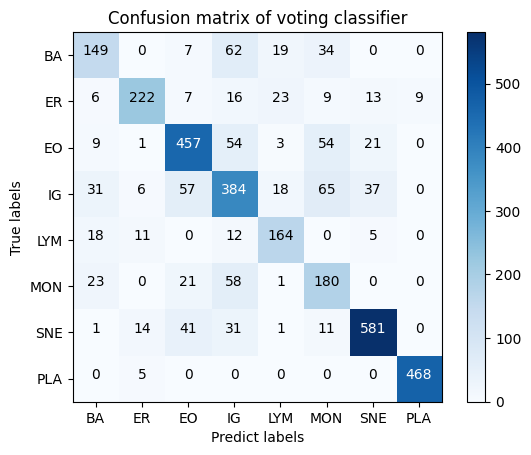

In [ ]:
cnf_matrix = confusion_matrix(y_test70, gridcv_VotCla.predict(X_test70_sc))

classes = ['BA', 'ER','EO','IG','LYM','MON','SNE','PLA']

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion matrix of voting classifier")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True labels')
plt.xlabel('Predict labels')
plt.show()

In [ ]:
print('Voting classifier classification report :\n\n', classification_report(y_test70, gridcv_VotCla.predict(X_test70_sc)))

Voting classifier classification report :

               precision    recall  f1-score   support

           1       0.63      0.55      0.59       271
           2       0.86      0.73      0.79       305
           3       0.77      0.76      0.77       599
           4       0.62      0.64      0.63       598
           5       0.72      0.78      0.75       210
           6       0.51      0.64      0.57       283
           7       0.88      0.85      0.87       680
           8       0.98      0.99      0.99       473

    accuracy                           0.76      3419
   macro avg       0.75      0.74      0.74      3419
weighted avg       0.77      0.76      0.76      3419



In [ ]:
##récupération du pikl
from sklearn.externals import joblib

# Print training and test scores
print('Score random forest training:', rd.score(X_train70, y_train70))
print('Score random forest test:', rd.score(X_test70, y_test70))

# Specify the path and filename to save the model
path_to_save = '/path/to/save/random_forest_model_df70.pkl'

# Save the model to the specified path and filename
joblib.dump(rd, path_to_save)